# Comparison of Preemption Times for Static and Dynamically Allocated Shared Memory

Analyzes the premeption time differences for statically and dynamically allocated shared memory along with manually setting the L1 cache carveout or letting the compiler figure it out.

### Read in the data

In [1]:
import os
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

# Create lists of all file paths
def parse_paths(dir_path: str) -> list[str]:
  """
  Return a list of file paths in alphanumeric order
  """
  paths = []
  for filename in os.listdir(dir_path):
    if filename == '.DS_Store':
      continue
    file_path = os.path.join(dir_path, filename)
    if os.path.isfile(file_path):
      paths.append(file_path)
  return sorted(paths)

# Match usage static paths
match_static_paths = parse_paths("StaticData")

# Max static shared paths
max_static_paths = parse_paths("CompilerData") 

# Match usage dynamic paths
match_dynamic_paths = parse_paths("SetCapacityData")

# Max dynamic shared paths
max_dynamic_paths = parse_paths("MaxCarveout")

# Global memory trial
global_path = 'NoSharedData/LxavierNoSharedTwelve12th.csv'

# No memory trial
clean_path = 'CleanCache/xavierNoMemory1.csv'

# =================================
# Read in the data
# =================================
%cd ~/Desktop/Research/GPU-research/Preemptions
from analyzer_functions import *
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier
import numpy as np

def read_ivls(paths, single=False):
  if single:
    data, ivls = data_loader(singlePath=paths, single=True)
    return  np.array(ivls) / 1000
  ivls_array = []
  for path in paths:
    data, ivls = data_loader(singlePath=path, single=True)
    # convert to microseconds
    ivls = np.array(ivls) / 1000
    ivls_array.append(ivls)
  return ivls_array

# Load matched static intervals
match_static_ivls = read_ivls(match_static_paths)

# Load max static intervals
max_static_ivls = read_ivls(max_static_paths)

# Load matched dynamic intervals
match_dynamic_ivls = read_ivls(match_dynamic_paths)

# Load max dynamic intervals
max_dynamic_ivls = read_ivls(max_dynamic_paths)

# Load global memory preemption intervals
global_ivls = read_ivls(global_path, single=True)


/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier


## Static Shared Memory: Max Allocation vs Matching Usage

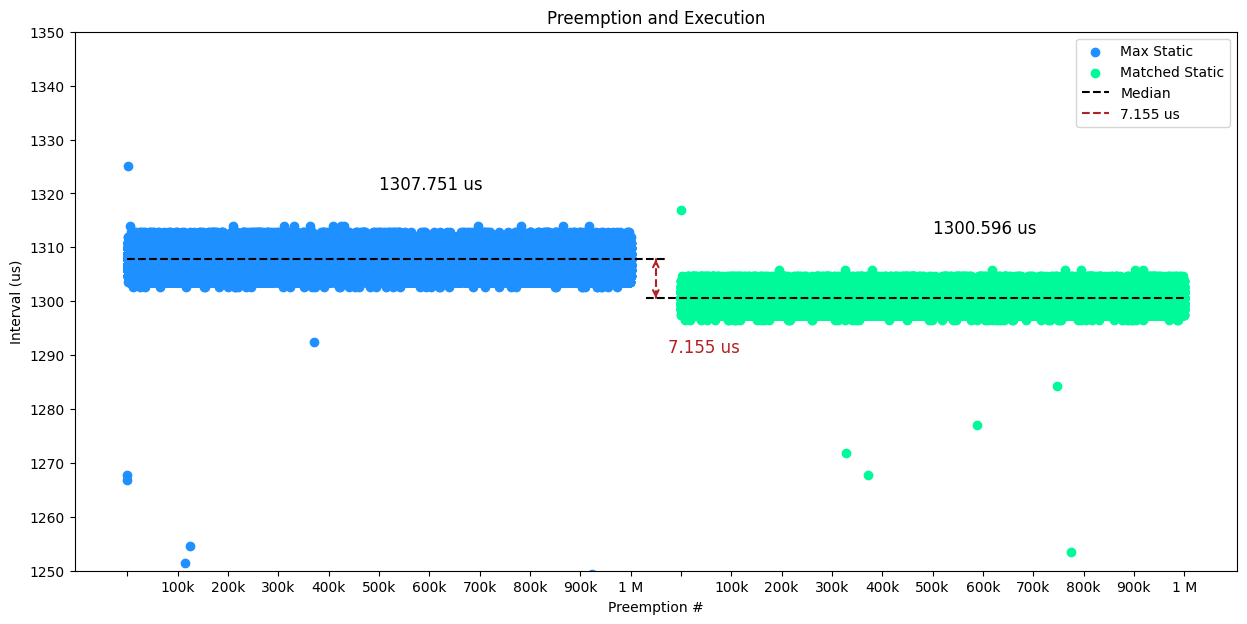

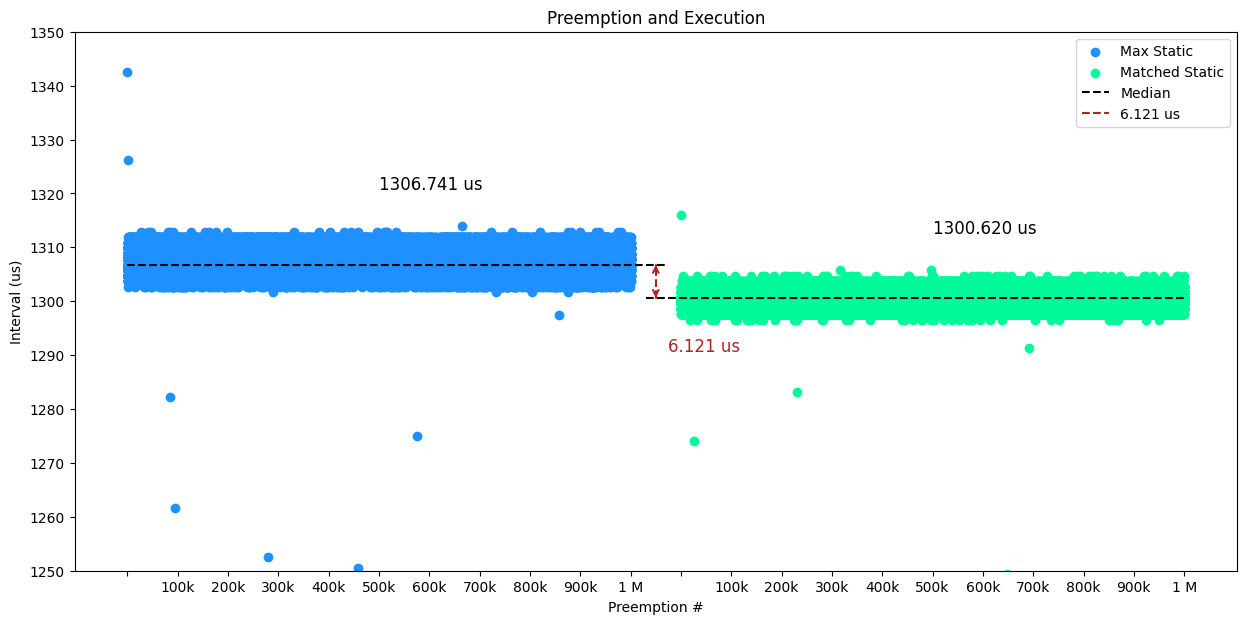

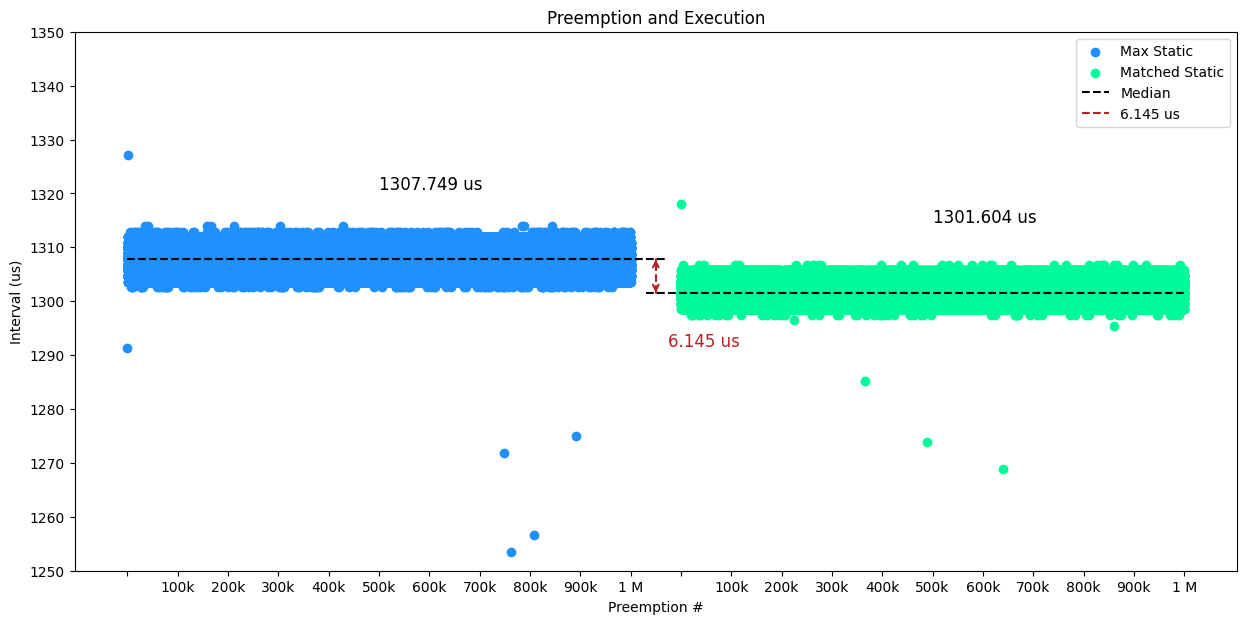

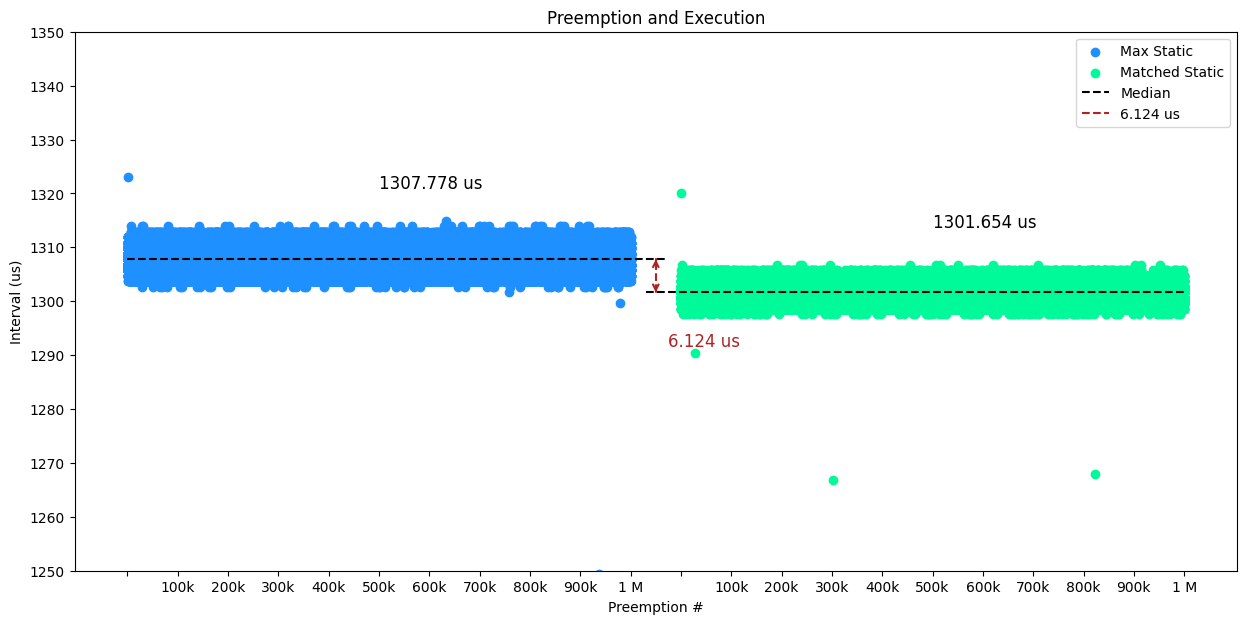

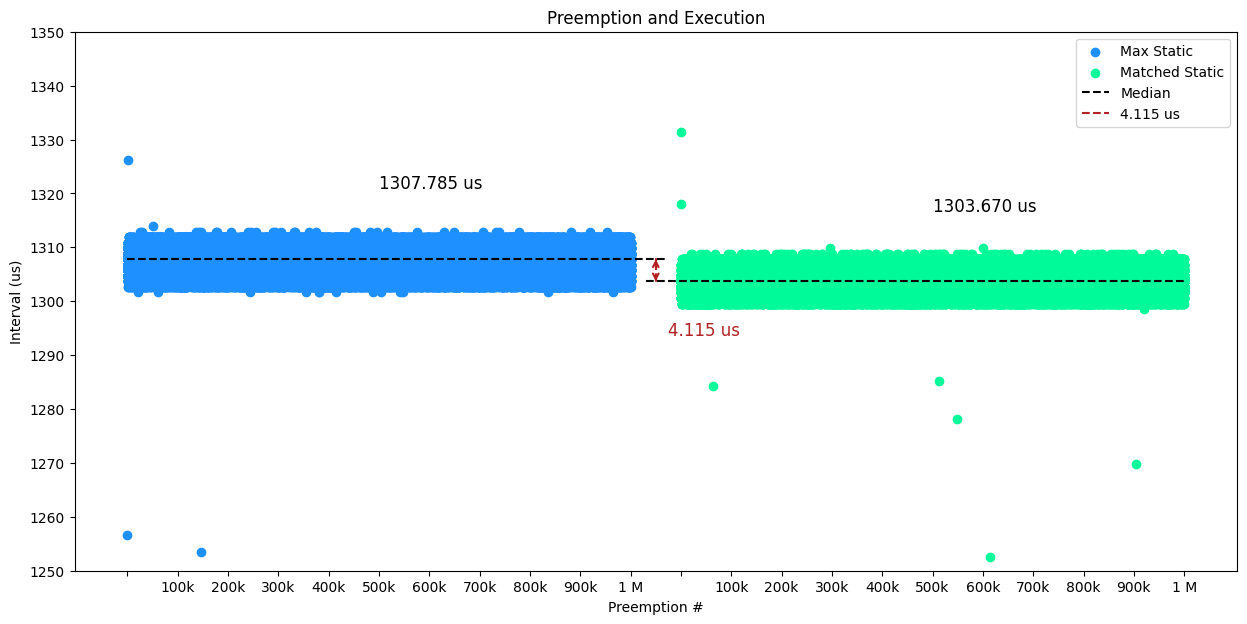

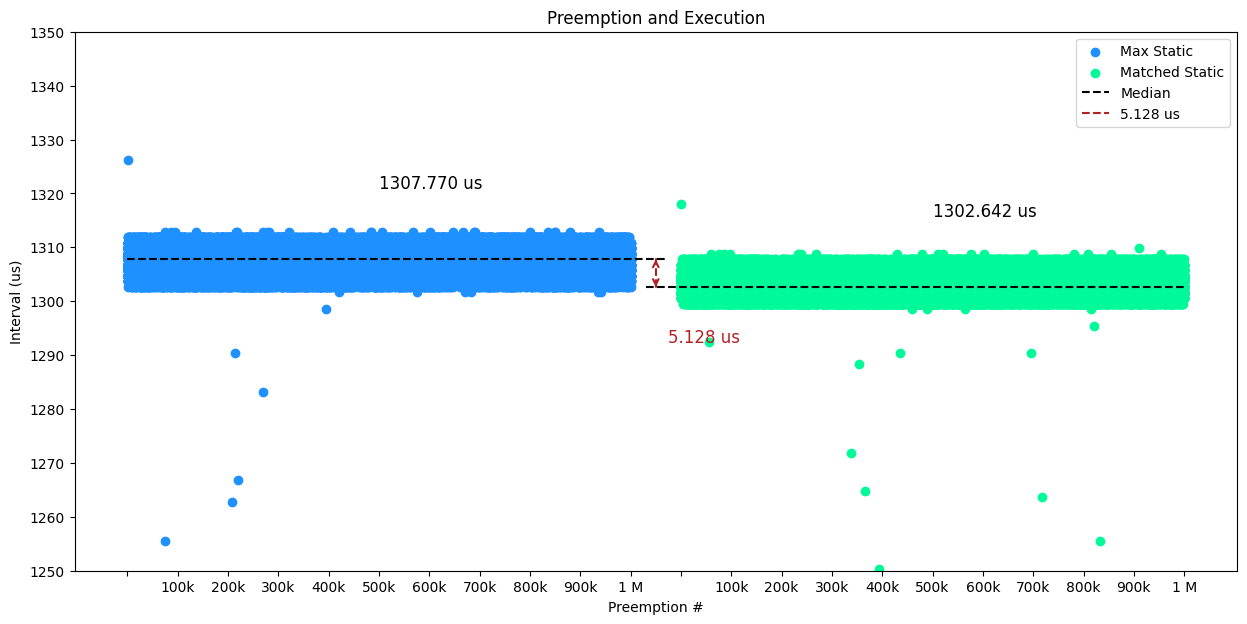

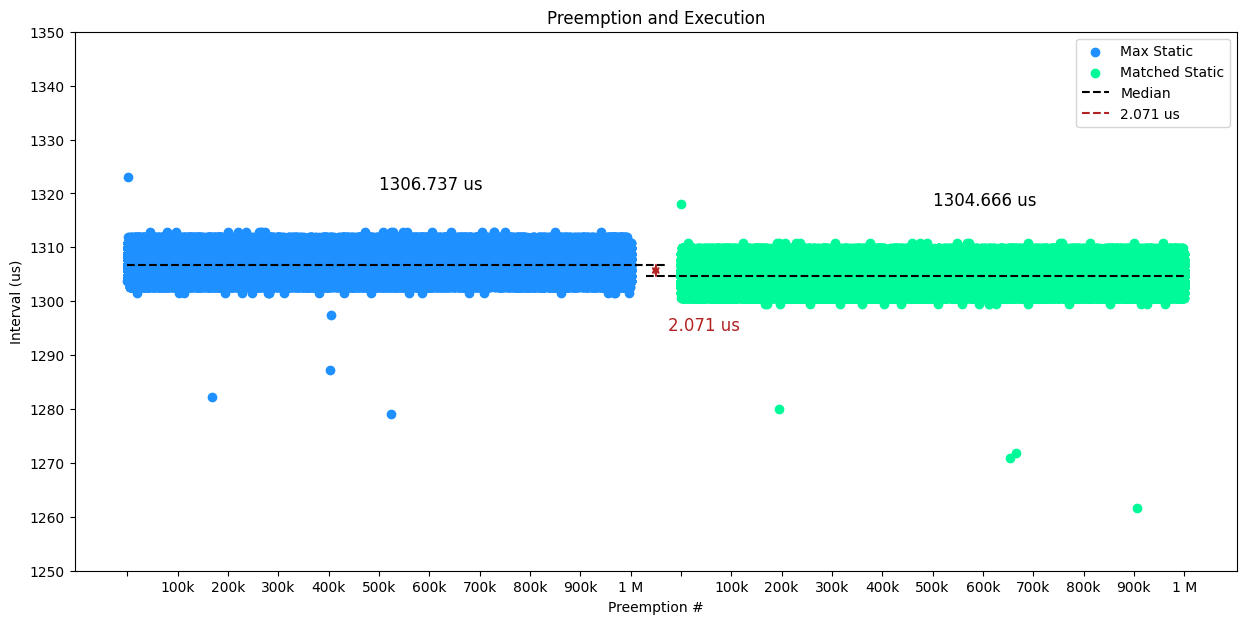

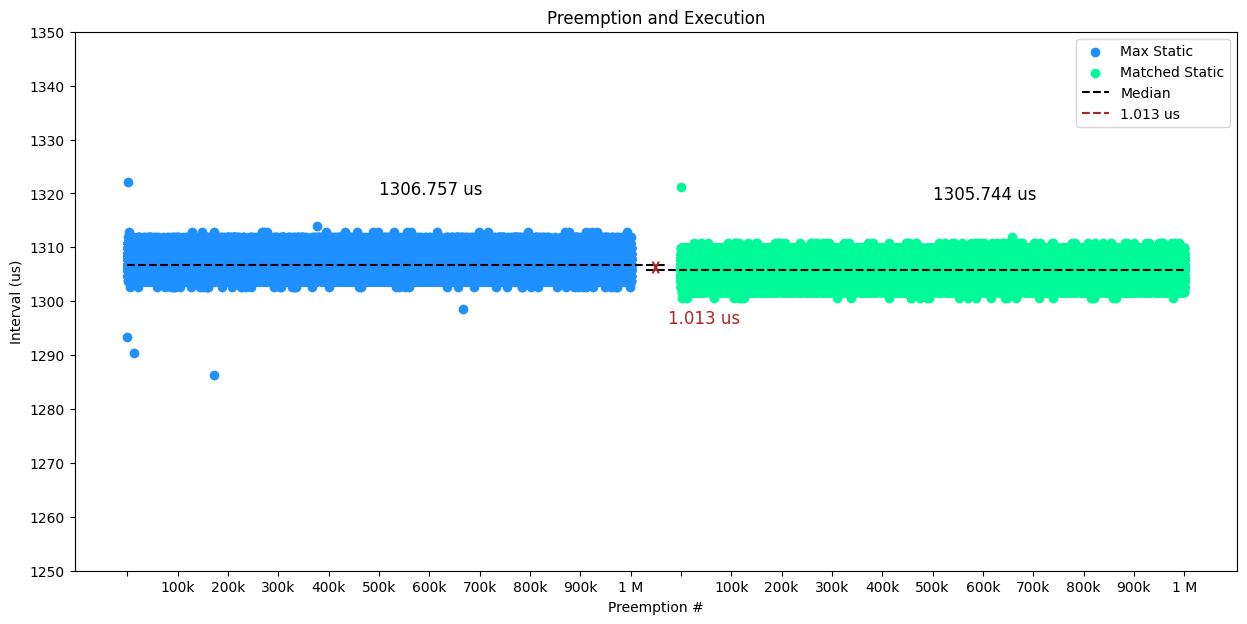

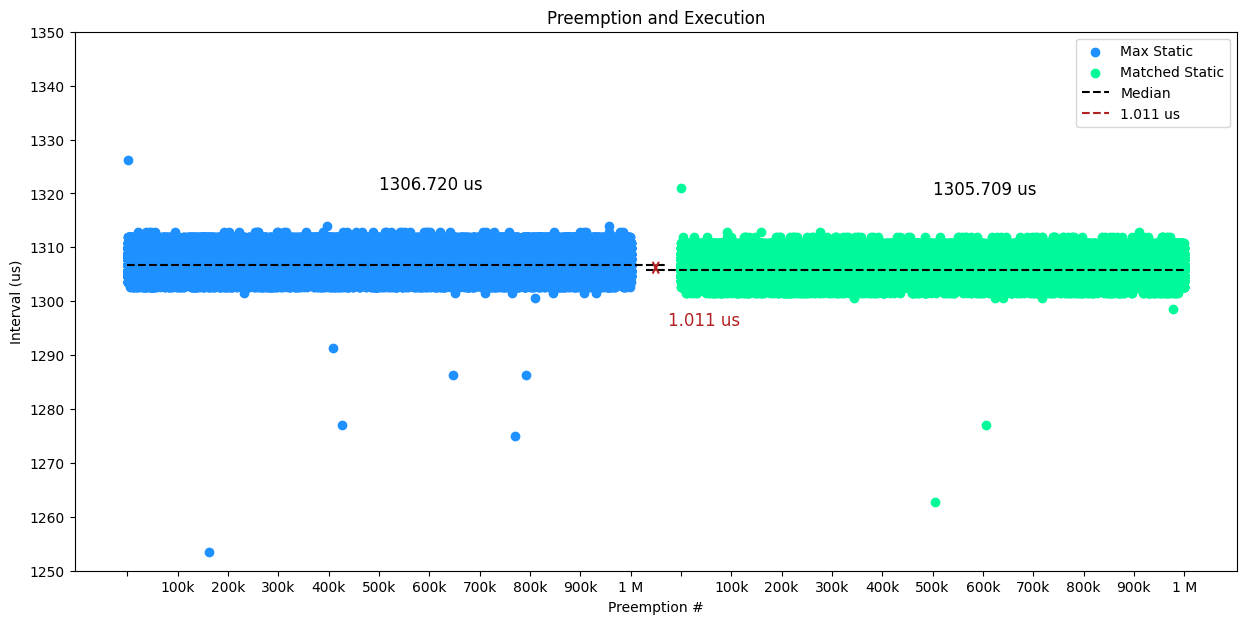

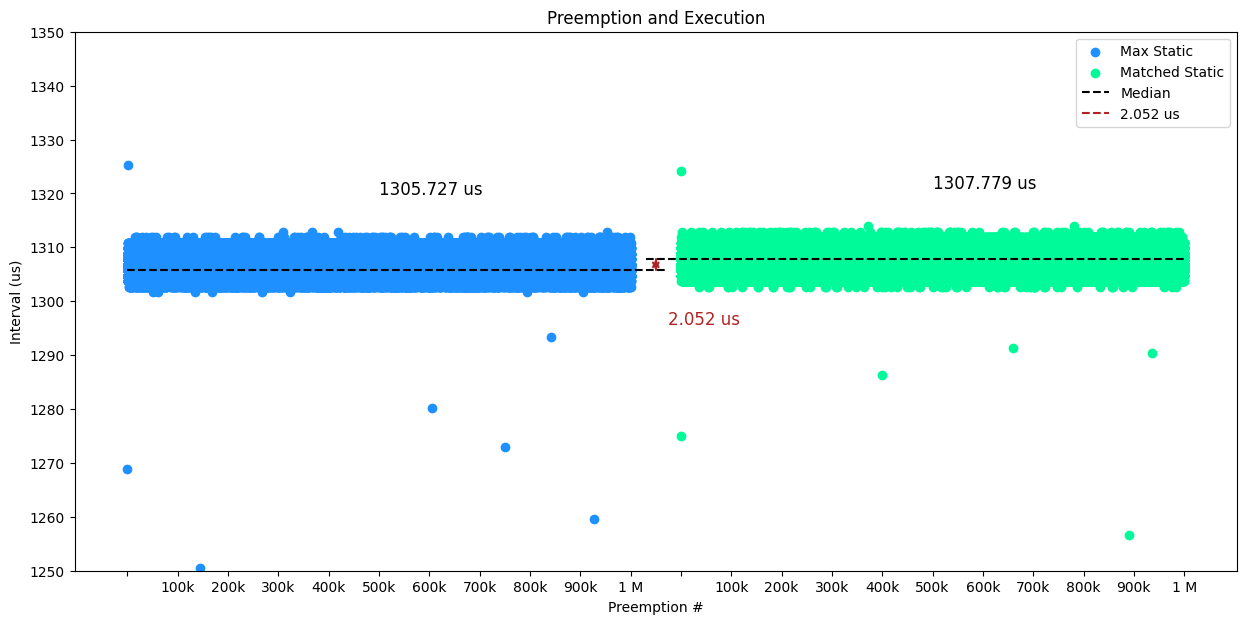

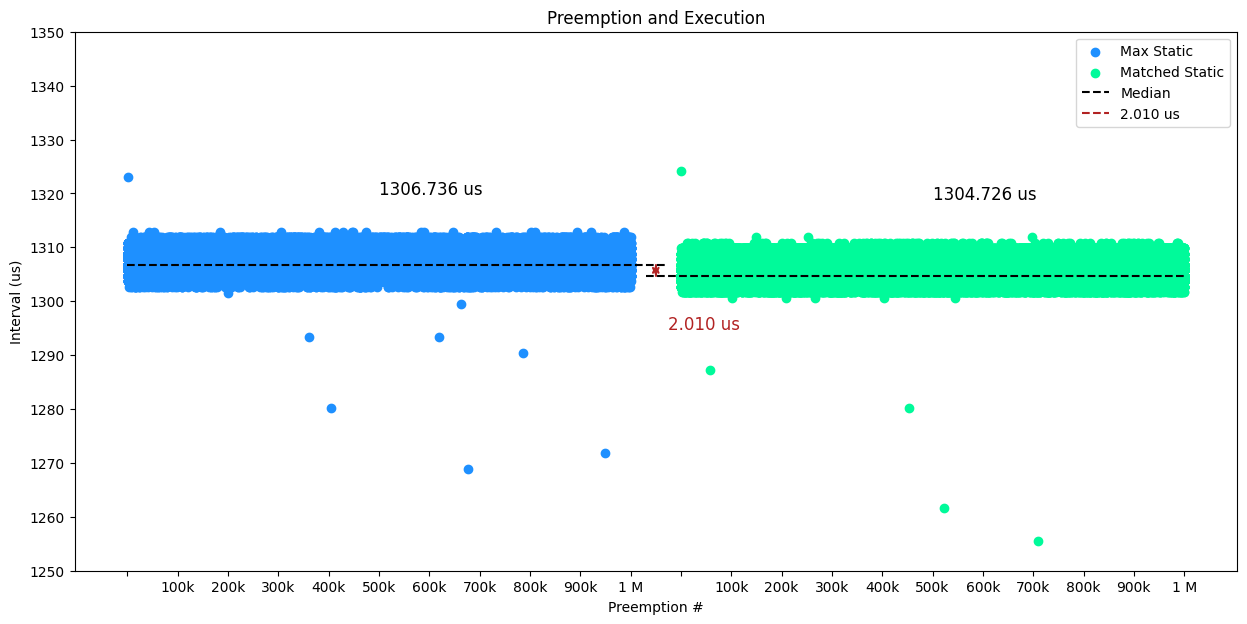

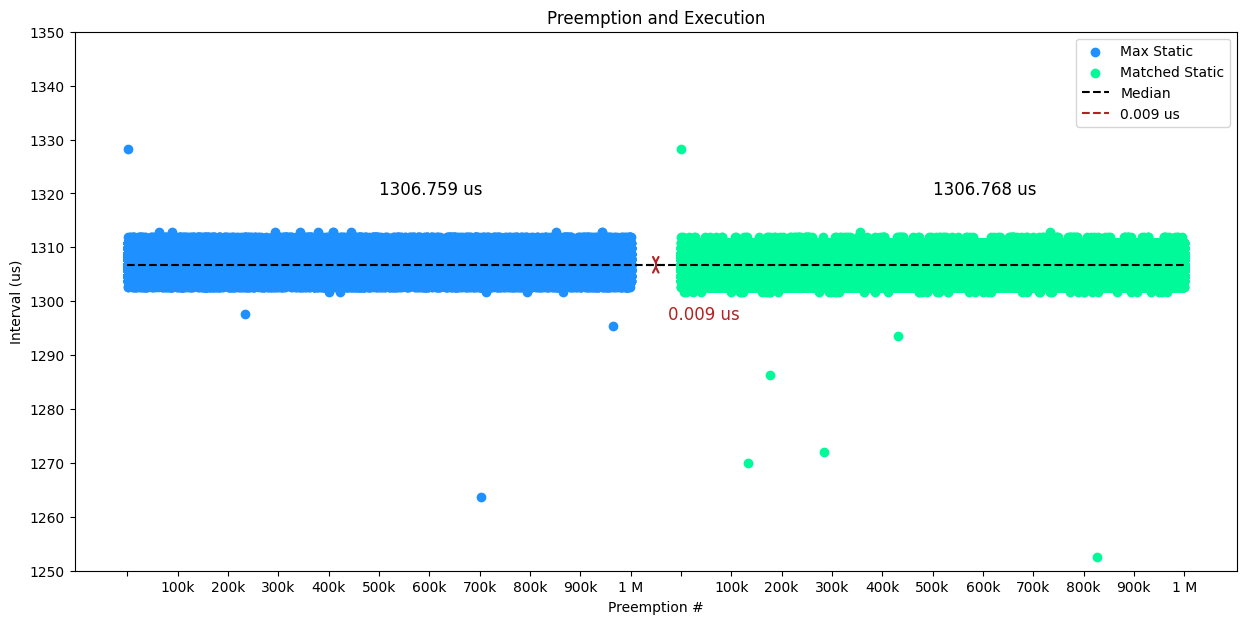

In [2]:
def plot_ivls(left_ivls, right_ivls, left_label, right_label, dual=False):
  NUM_SAMPLES = 1000000
  offset = NUM_SAMPLES // 10
  if dual:
    for left, right in zip(left_ivls, right_ivls):
      plot_side_by_side(noSharedData=left, sharedData=right, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.35e3, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label)  
  else:
    for ivls in right_ivls:
      plot_side_by_side(noSharedData=left_ivls, sharedData=ivls, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.35e3, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label)

plot_ivls(max_static_ivls, match_static_ivls, left_label="Max Static", right_label="Matched Static", dual=True)

## Dynamic vs Static Shared Memory

### Max allocation

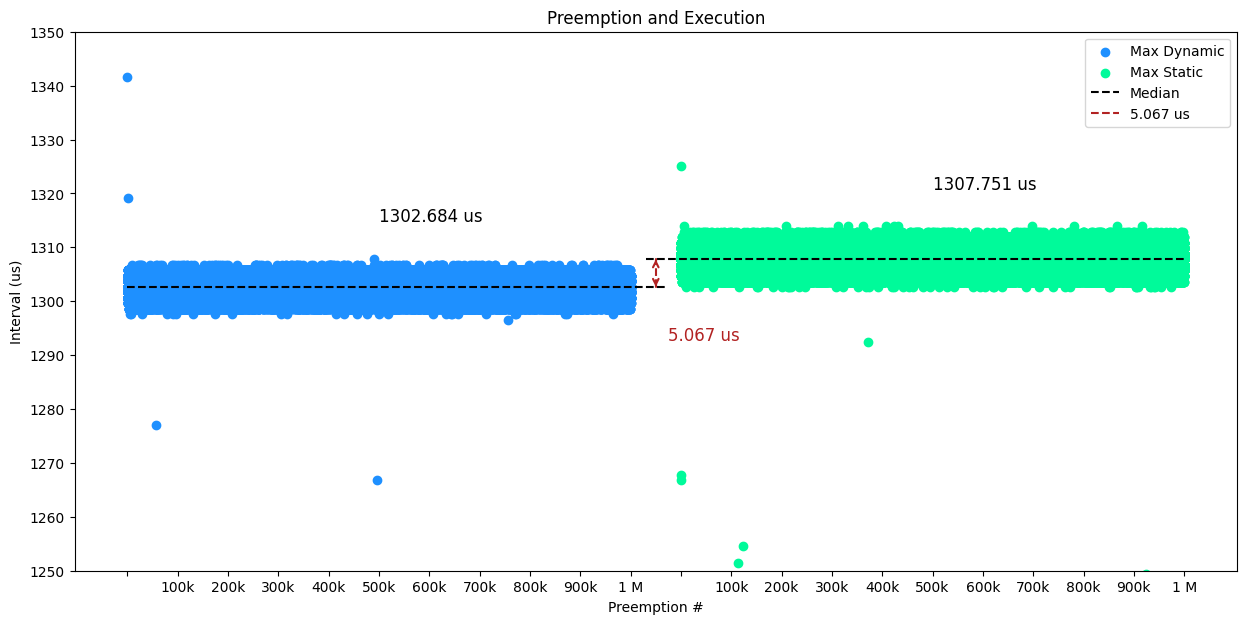

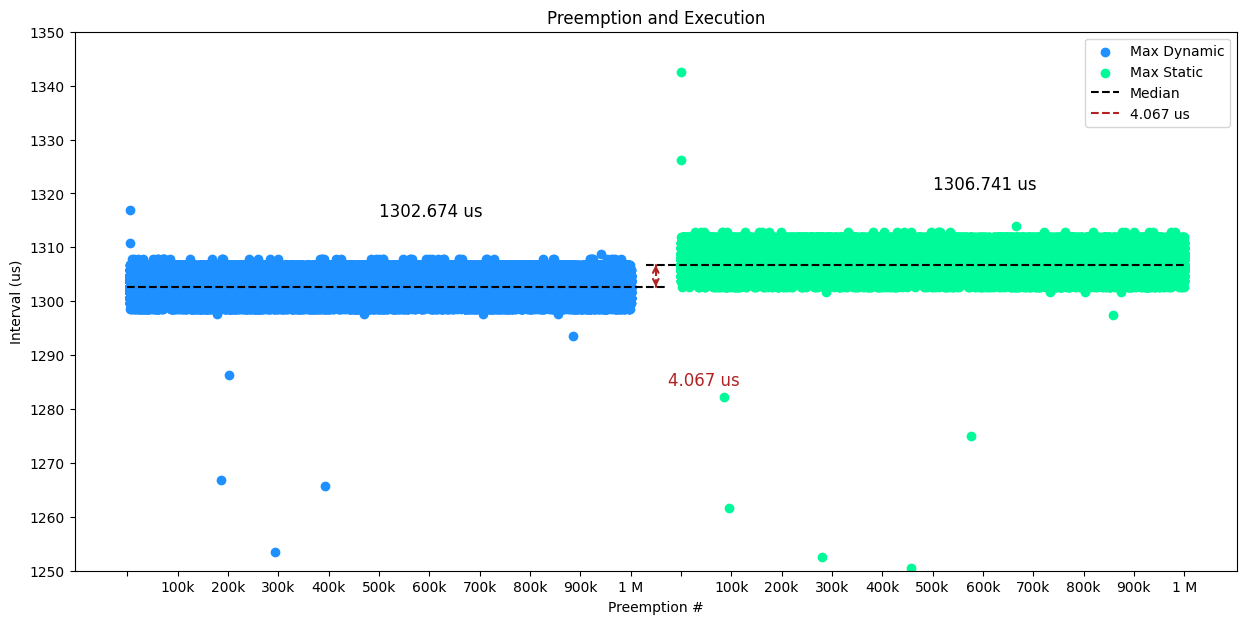

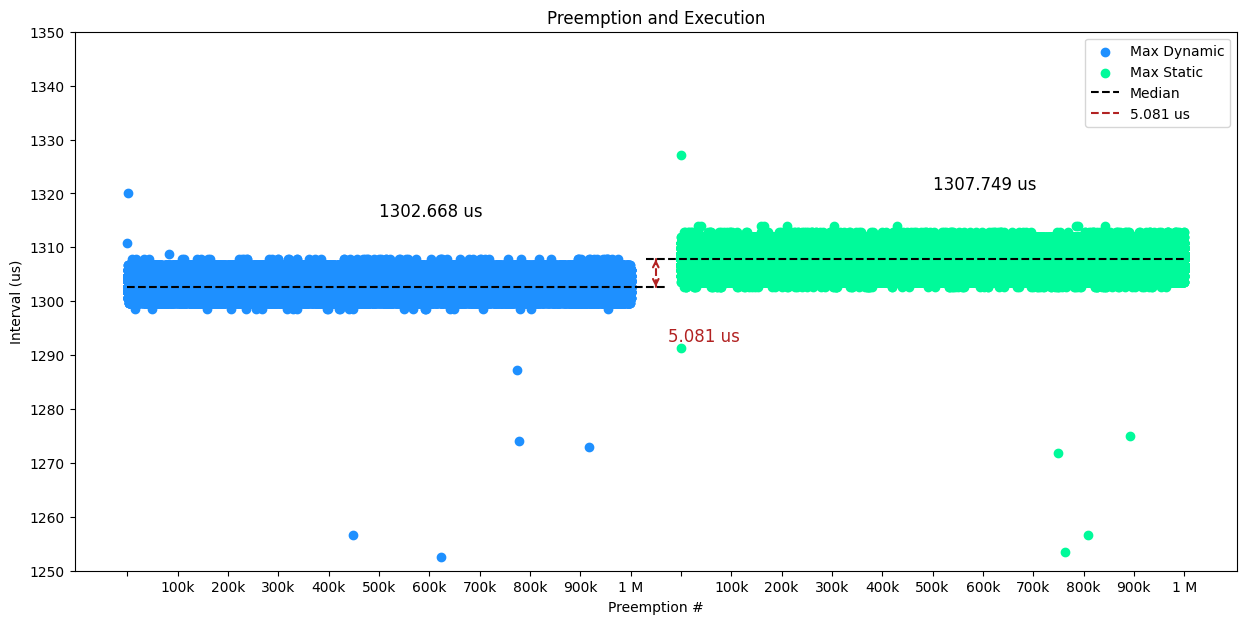

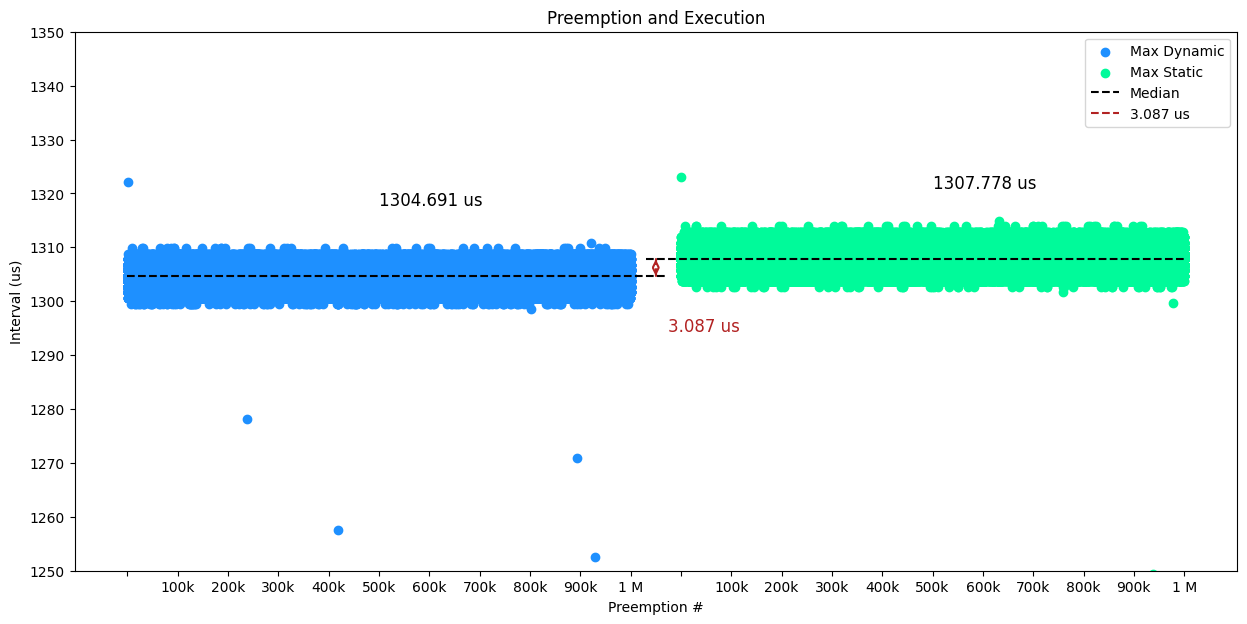

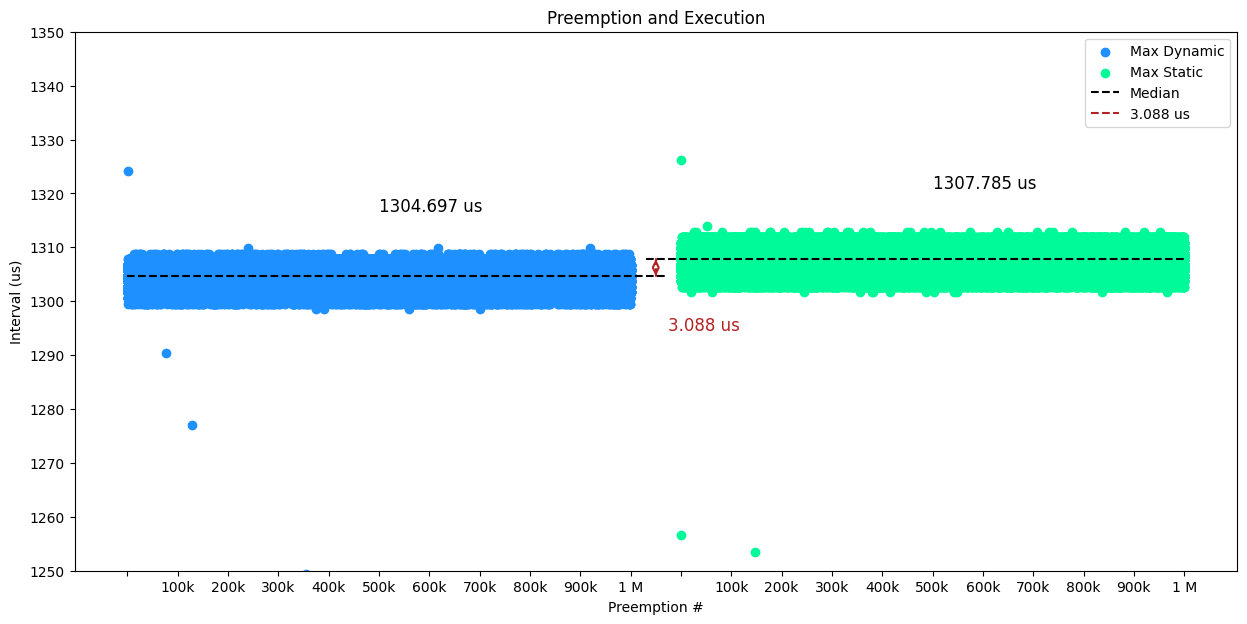

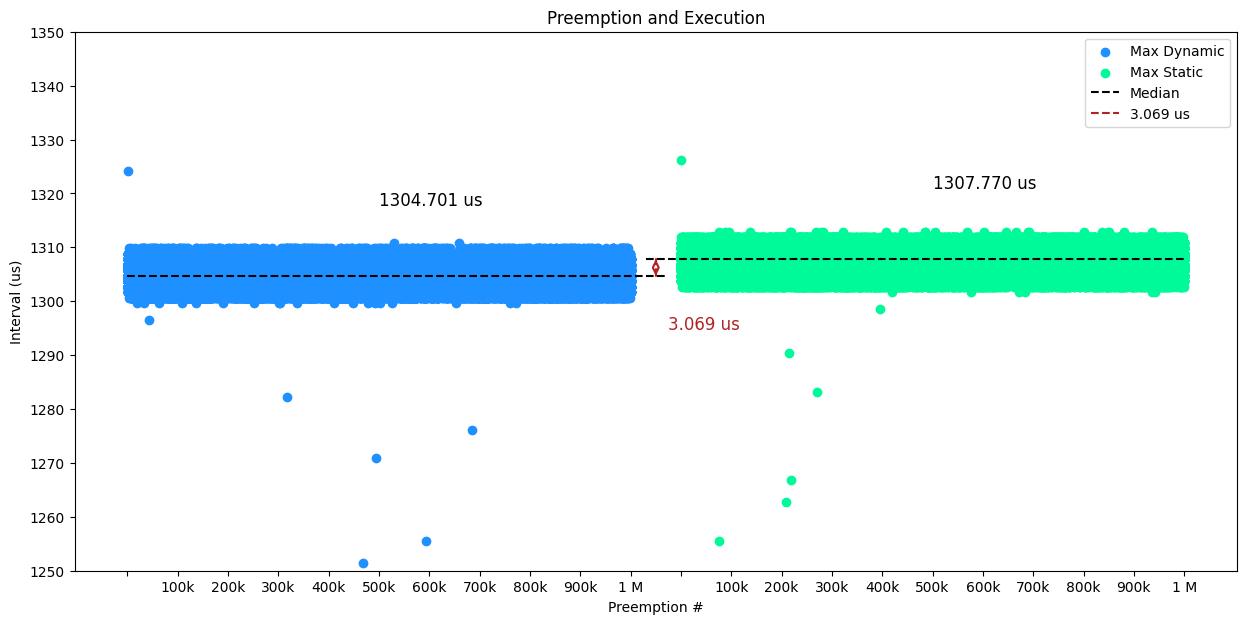

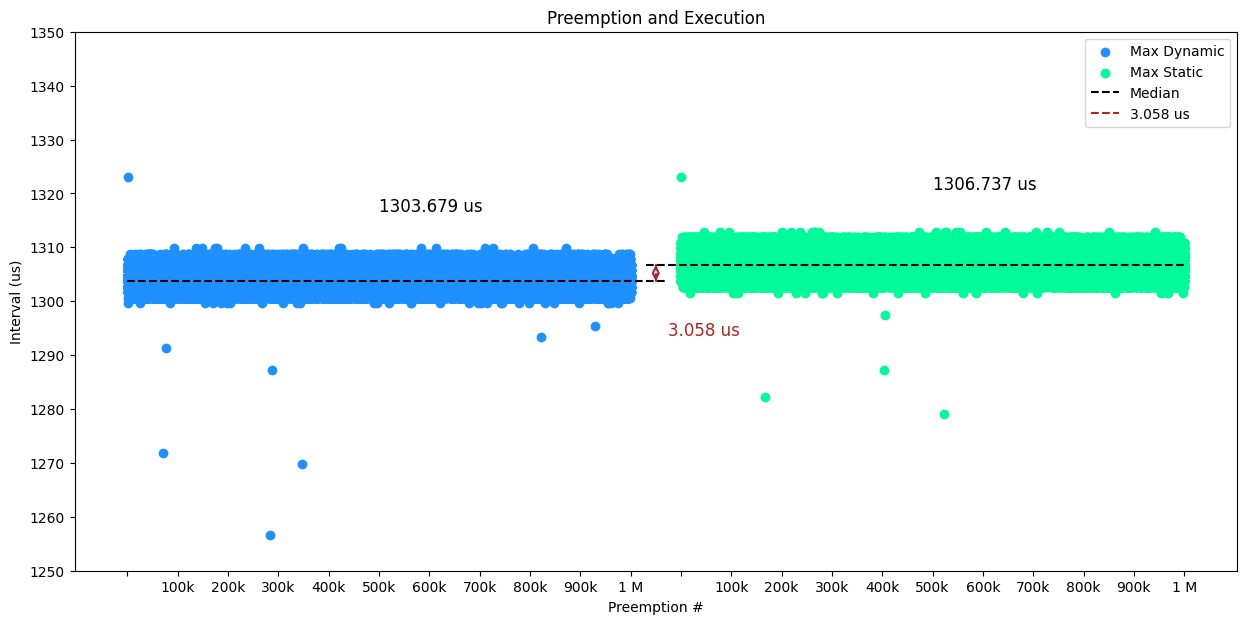

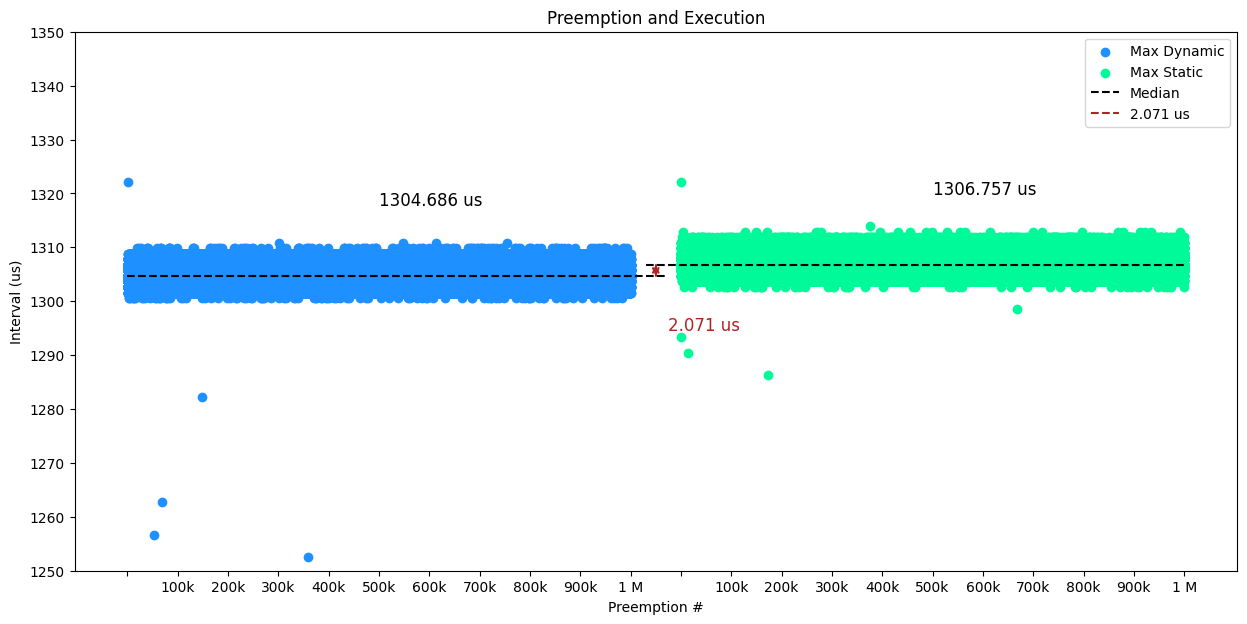

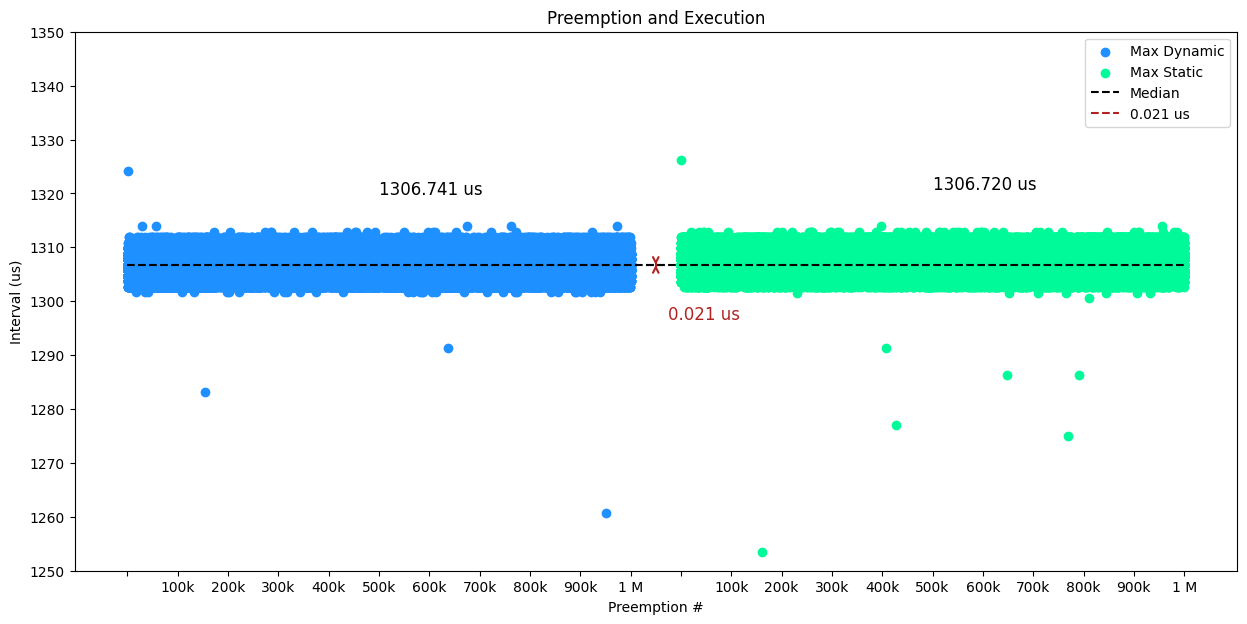

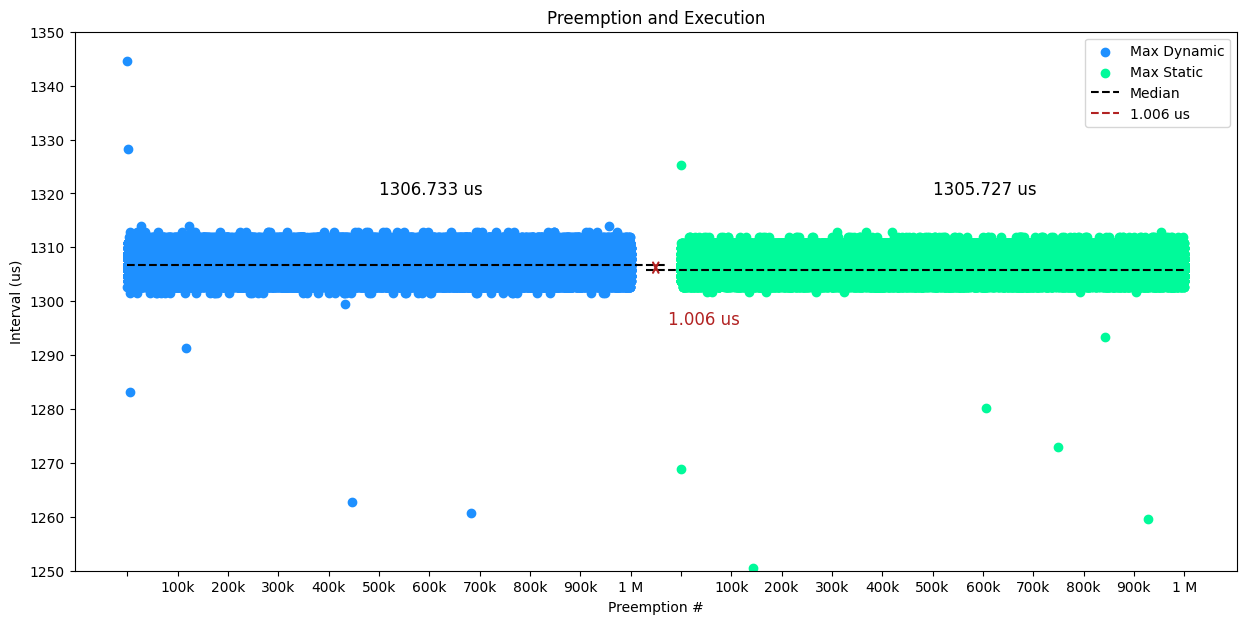

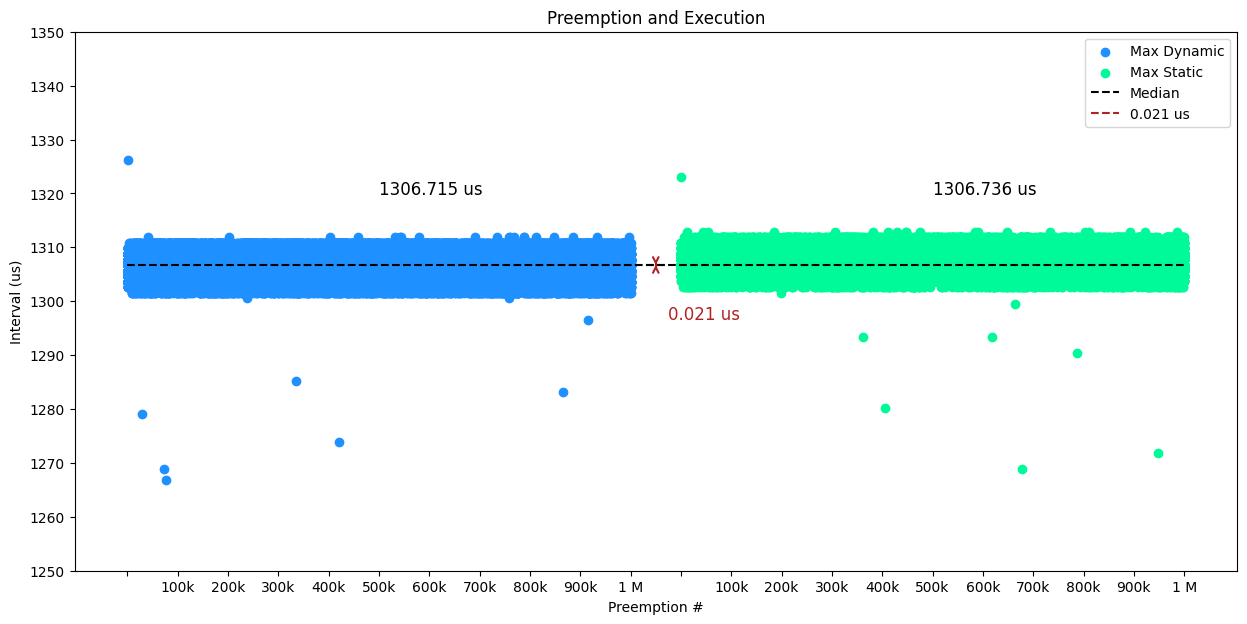

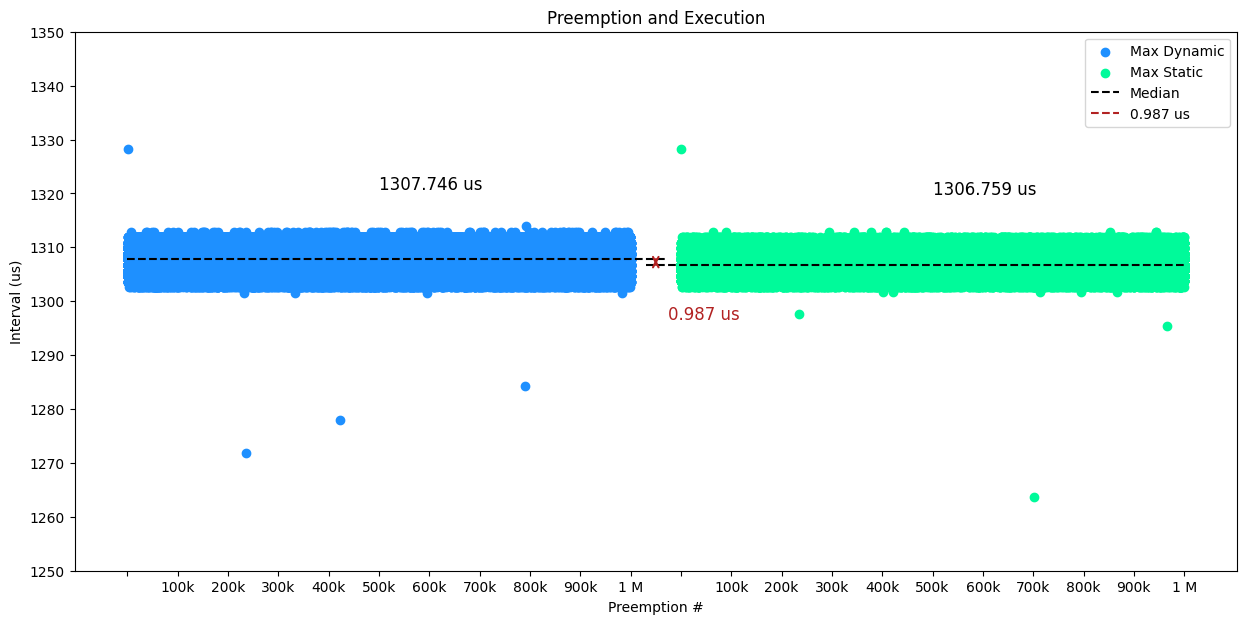

In [3]:
plot_ivls(max_dynamic_ivls, max_static_ivls, left_label="Max Dynamic", right_label="Max Static", dual=True)

### Matching usage

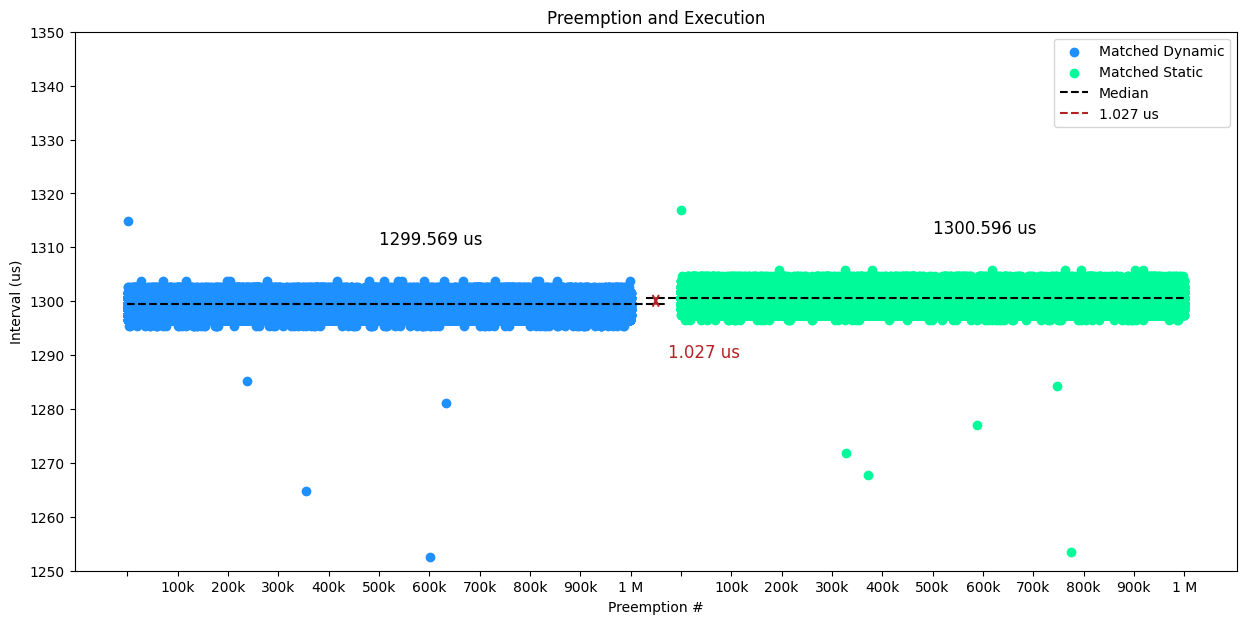

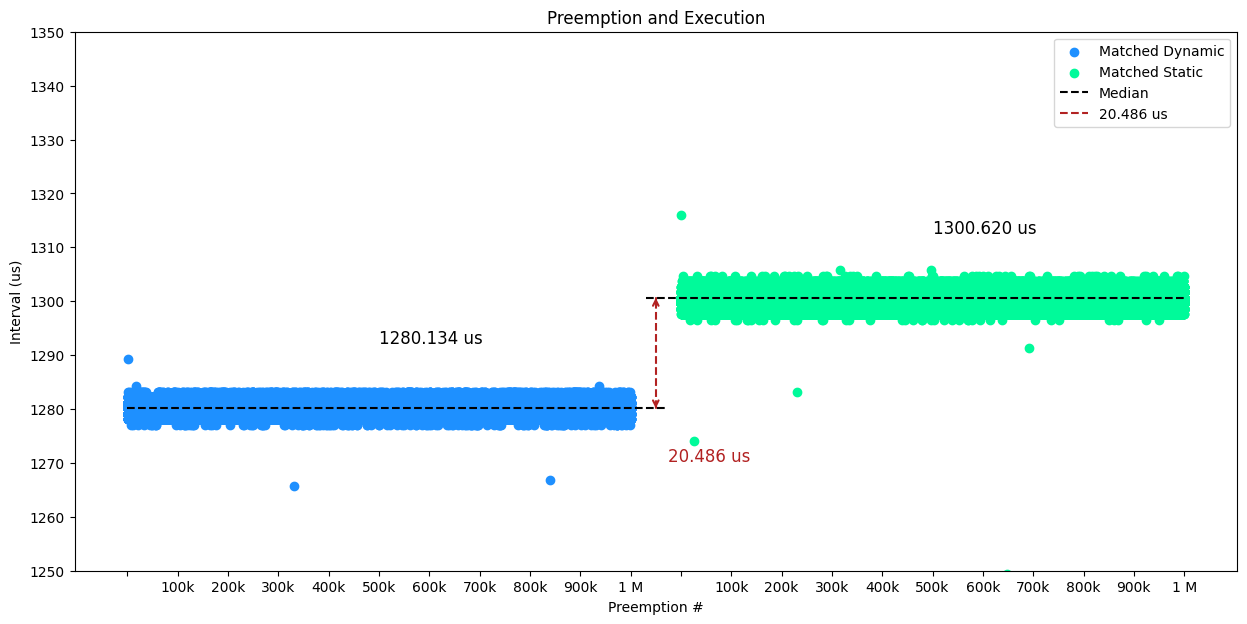

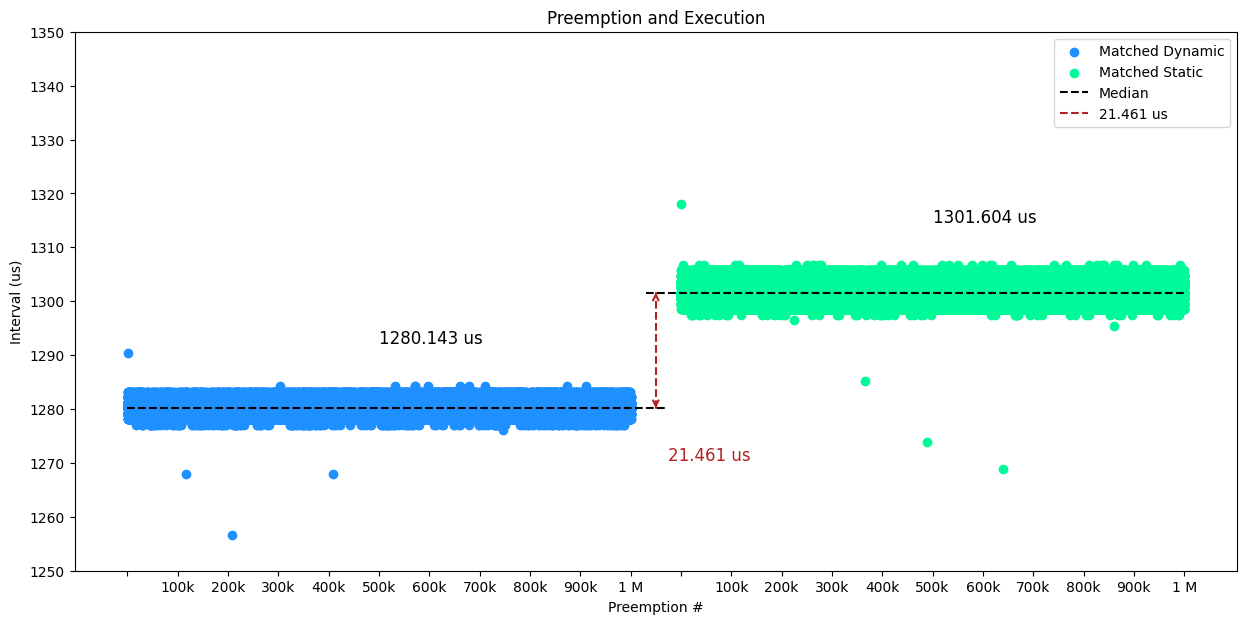

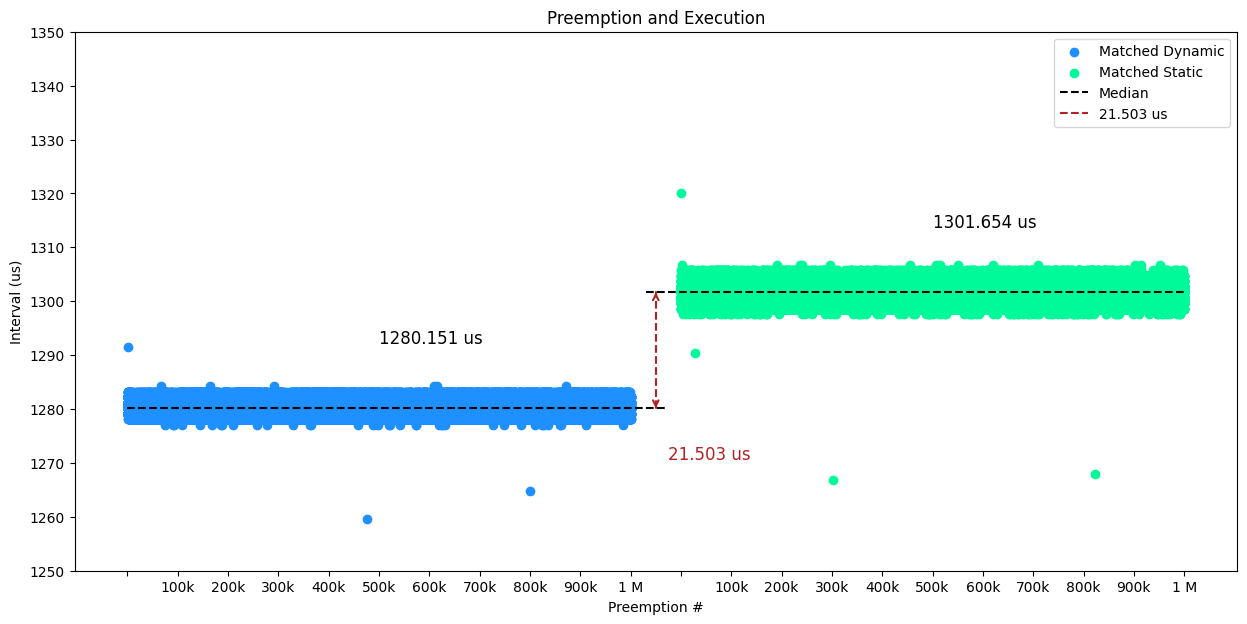

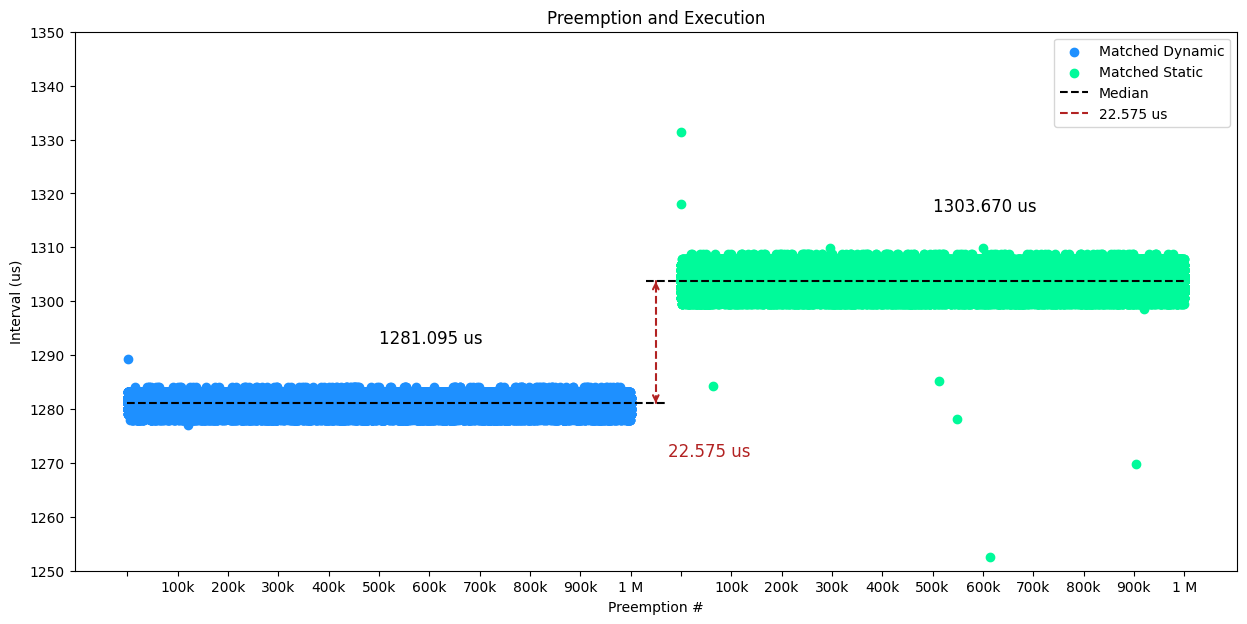

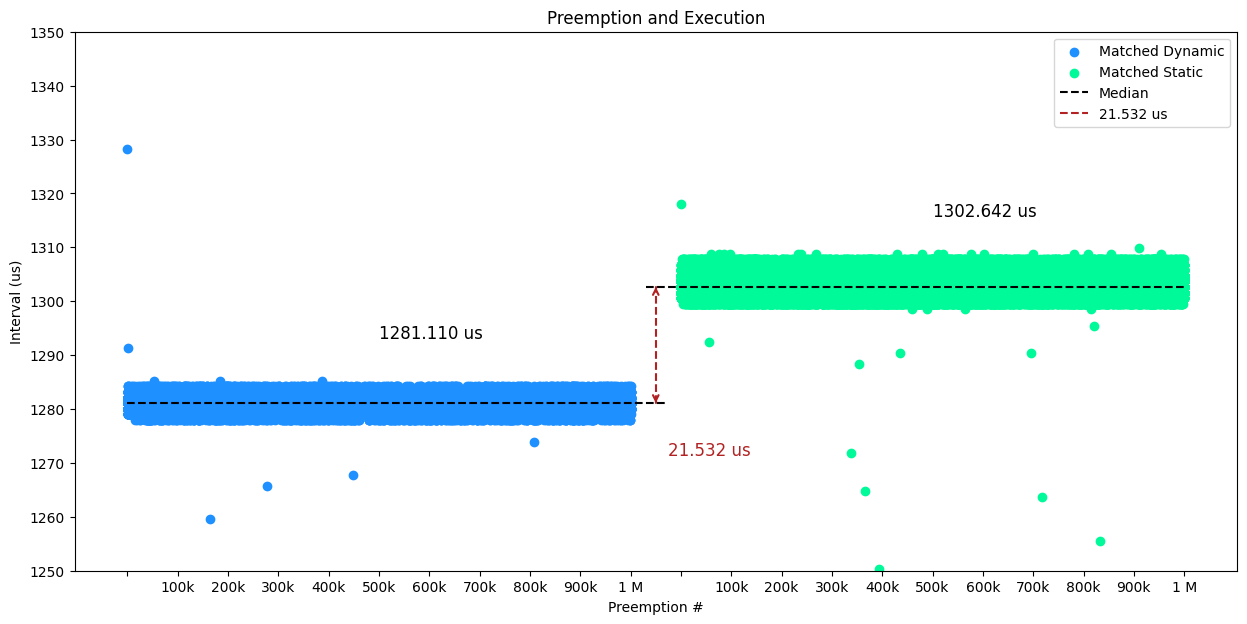

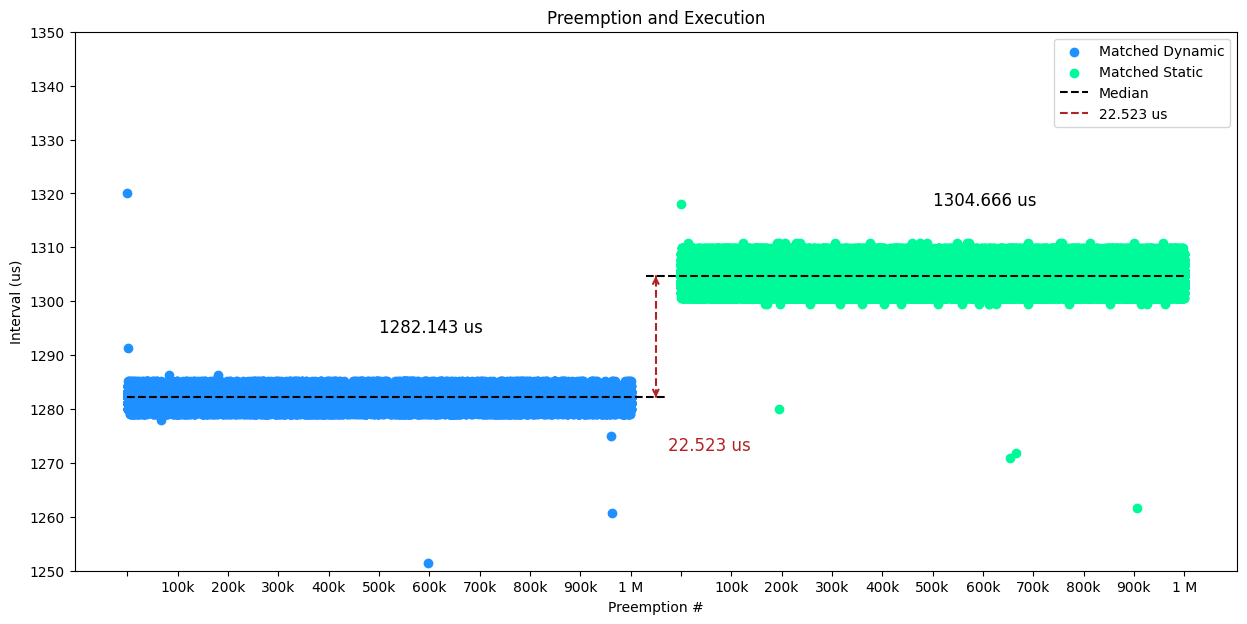

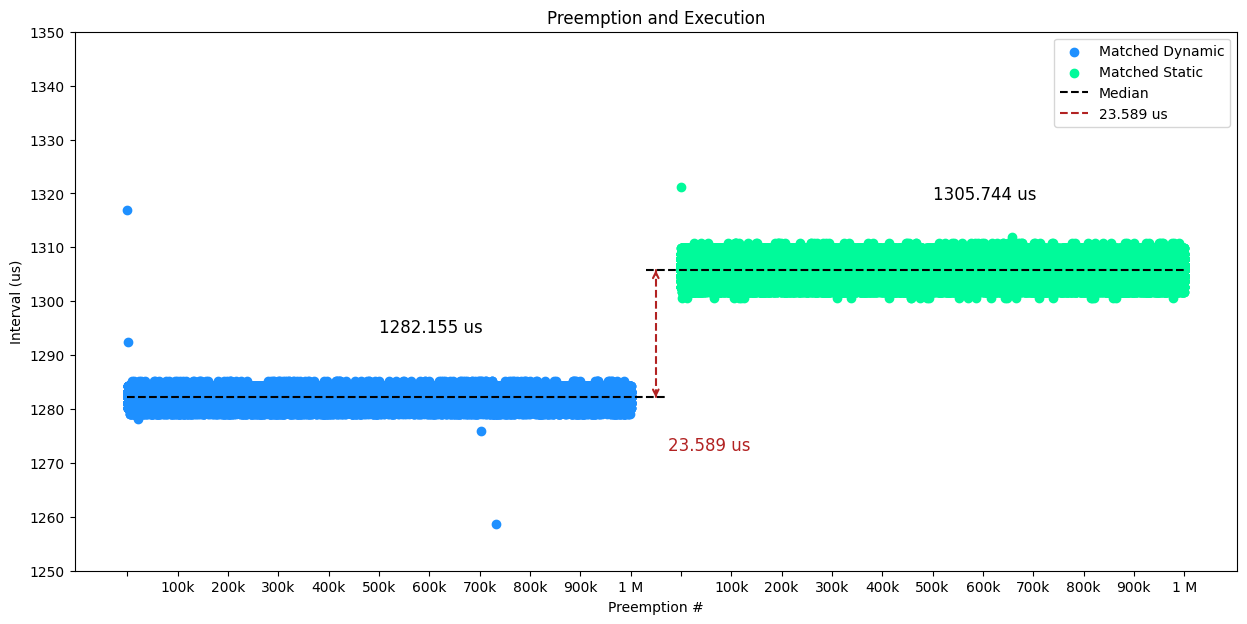

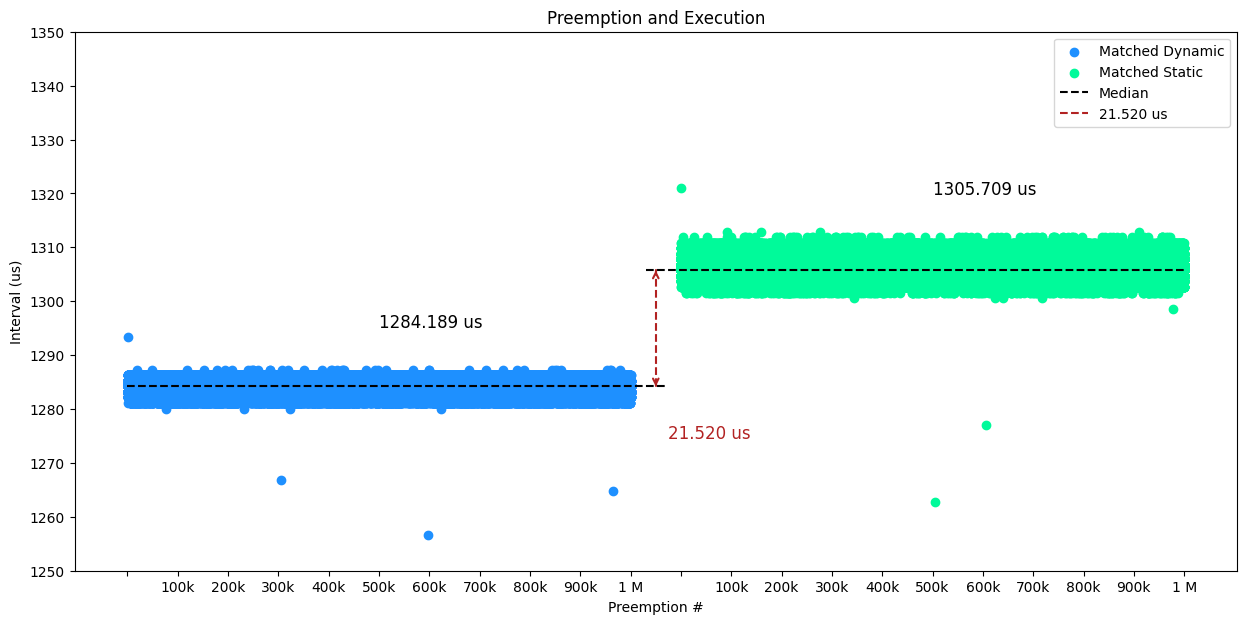

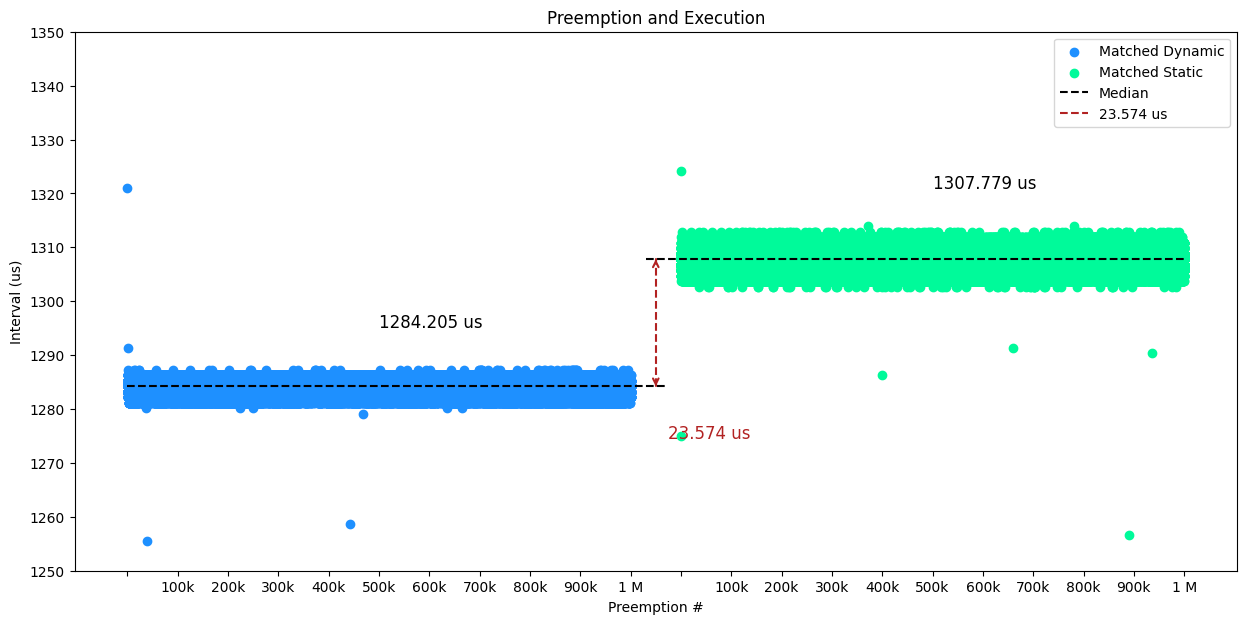

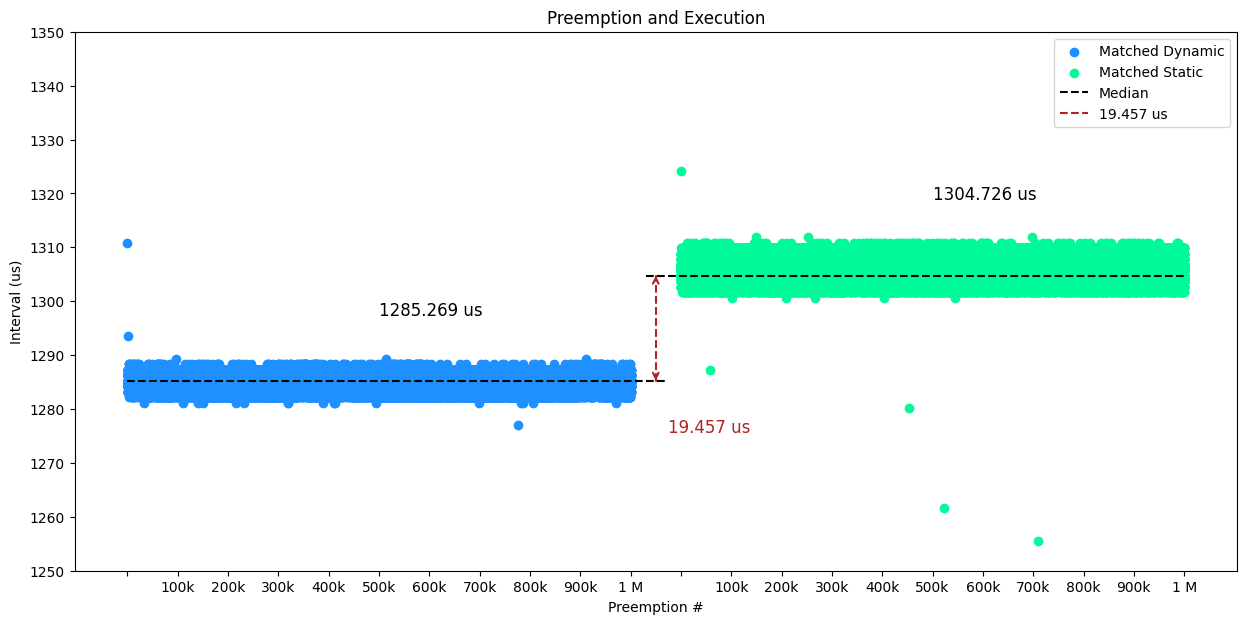

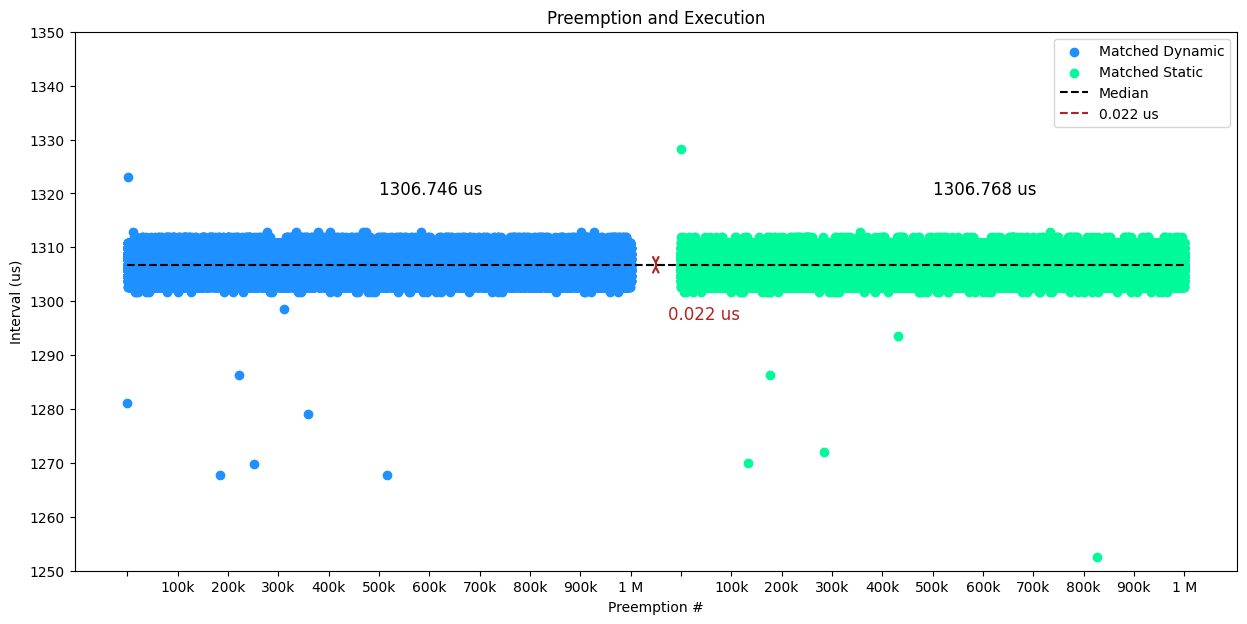

In [4]:
plot_ivls(match_dynamic_ivls, match_static_ivls, left_label="Matched Dynamic", right_label="Matched Static", dual=True)